In [2]:
import pandas as pd
import os
import csv
import io
import numpy as np

In [3]:
segment_id = 78

filename = f'temperature_degree_c/{segment_id}_temperature_degree_c.csv'

df = pd.read_csv(filename, parse_dates=['timestamp_utc'], index_col='timestamp_utc', date_format="%m/%d/%Y %I:%M:%S %p")
# todo: figure out why the data is always sorted
df = df.sort_index()

# Make missing gap

In [4]:
percentage = 10

num_rows = len(df)
num_missing = int(num_rows * percentage / 100)
    
# Ensure at least one row is set as missing
num_missing = max(1, num_missing)

# Randomly select a starting index for the contiguous block
start_index = np.random.randint(0, num_rows - num_missing + 1)

df['missing'] = df.iloc[:,0]
# Set the contiguous block of rows as missing (NaN)
df.iloc[start_index:start_index + num_missing, df.columns.get_loc('missing')] = np.nan

df_original = df.copy()

<Axes: xlabel='timestamp_utc'>

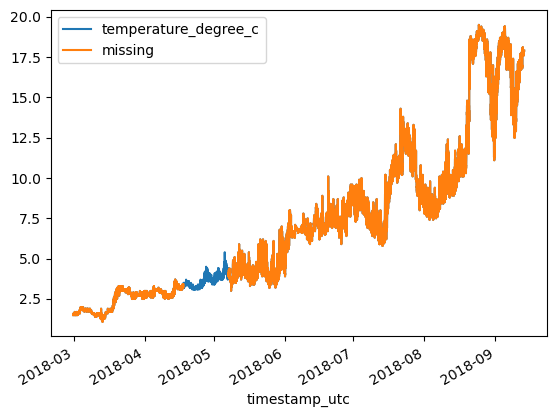

In [5]:
df.plot()

## Last Observation Carried Forward

<Axes: xlabel='timestamp_utc'>

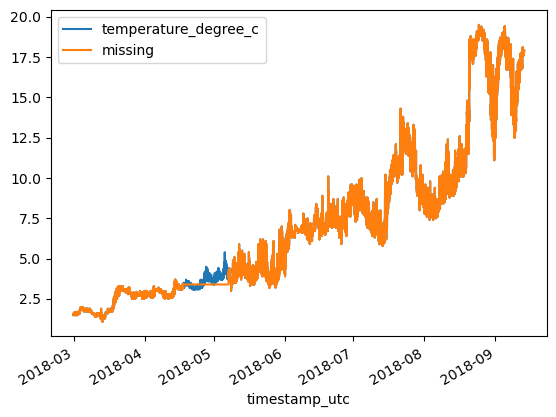

In [6]:
df = df_original.copy()
df['missing'] = df['missing'].ffill()
df.plot()

In [7]:
df['error'] = df['temperature_degree_c'] - df['missing']
MAE = np.mean(abs(df['error']))
RMSE = np.sqrt(np.mean((df['error'])**2))

print(f'MAE: {MAE:.3}\tRMSE: {RMSE:.3}')

MAE: 0.0349	RMSE: 0.145


## Mean Value

<Axes: xlabel='timestamp_utc'>

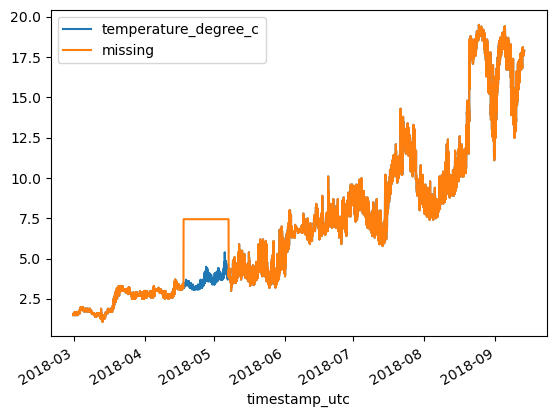

In [8]:
df = df_original.copy()
df['missing'] = df['missing'].fillna(df['missing'].mean())
df.plot()

In [9]:
df['error'] = df['temperature_degree_c'] - df['missing']
MAE = np.mean(abs(df['error']))
RMSE = np.sqrt(np.mean((df['error'])**2))

print(f'MAE: {MAE:.3}\tRMSE: {RMSE:.3}')

MAE: 0.38	RMSE: 1.21


## Linear Interpolation

MAE: 0.0238	RMSE: 0.0919


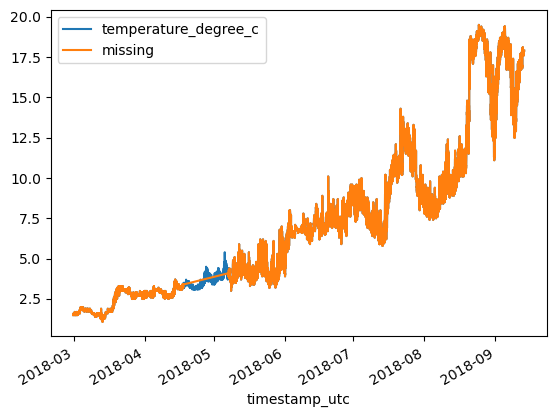

In [10]:
df = df_original.copy()
df['missing'] = df['missing'].interpolate(method='linear')
df.plot()

df['error'] = df['temperature_degree_c'] - df['missing']
MAE = np.mean(abs(df['error']))
RMSE = np.sqrt(np.mean((df['error'])**2))

print(f'MAE: {MAE:.3}\tRMSE: {RMSE:.3}')

## Nearest Neighbour

MAE: 0.0234	RMSE: 0.093


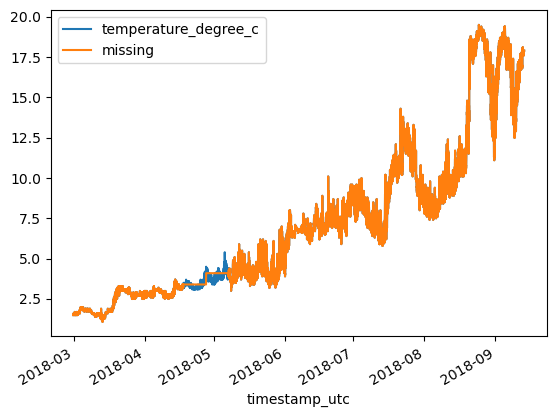

In [11]:
df = df_original.copy()
df['missing'] = df['missing'].interpolate(method='nearest')
df.plot()

df['error'] = df['temperature_degree_c'] - df['missing']
MAE = np.mean(abs(df['error']))
RMSE = np.sqrt(np.mean((df['error'])**2))

print(f'MAE: {MAE:.3}\tRMSE: {RMSE:.3}')

## Polynomial Interpolation

MAE: 3.31	RMSE: 12.8


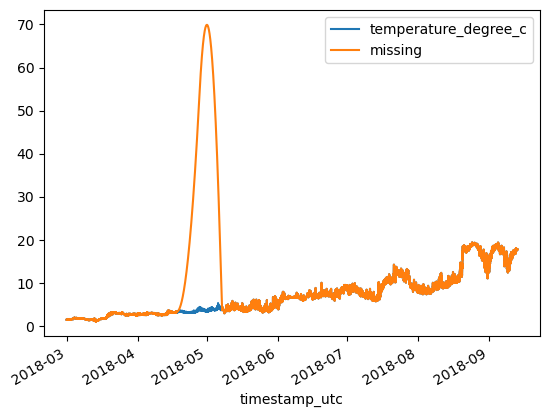

In [12]:
df = df_original.copy()
df['missing'] = df['missing'].interpolate(method='polynomial', order=2)
df.plot()

df['error'] = df['temperature_degree_c'] - df['missing']
MAE = np.mean(abs(df['error']))
RMSE = np.sqrt(np.mean((df['error'])**2))

print(f'MAE: {MAE:.3}\tRMSE: {RMSE:.3}')

MAE: 4.04	RMSE: 14.9


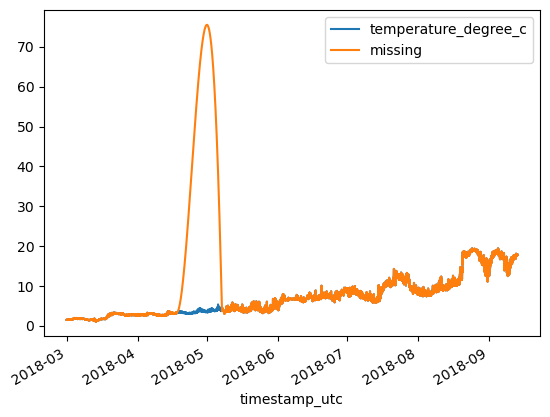

In [13]:
df = df_original.copy()
df['missing'] = df['missing'].interpolate(method='polynomial', order=3)
df.plot()

df['error'] = df['temperature_degree_c'] - df['missing']
MAE = np.mean(abs(df['error']))
RMSE = np.sqrt(np.mean((df['error'])**2))

print(f'MAE: {MAE:.3}\tRMSE: {RMSE:.3}')

## Spline interpolation

MAE: 0.032	RMSE: 0.13


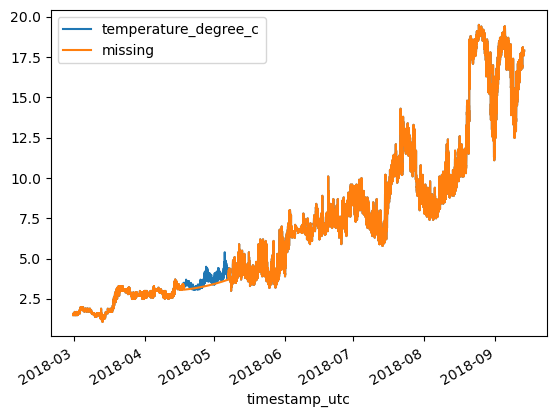

In [14]:
df = df_original.copy()
df['missing'] = df['missing'].interpolate(method='spline', order=2)
df.plot()

df['error'] = df['temperature_degree_c'] - df['missing']
MAE = np.mean(abs(df['error']))
RMSE = np.sqrt(np.mean((df['error'])**2))

print(f'MAE: {MAE:.3}\tRMSE: {RMSE:.3}')

MAE: 0.0292	RMSE: 0.12


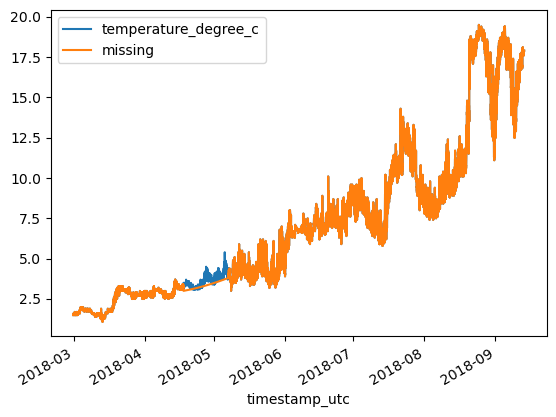

In [15]:
df = df_original.copy()
df['missing'] = df['missing'].interpolate(method='spline', order=3)
df.plot()

df['error'] = df['temperature_degree_c'] - df['missing']
MAE = np.mean(abs(df['error']))
RMSE = np.sqrt(np.mean((df['error'])**2))

print(f'MAE: {MAE:.3}\tRMSE: {RMSE:.3}')

## Moving average imputation

MAE: 0.0971	RMSE: 0.165


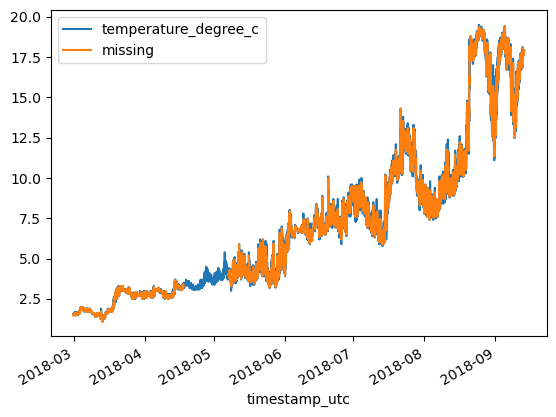

In [16]:
df = df_original.copy()
df['missing'] = df['missing'].rolling(4).mean()
df.plot()

df['error'] = df['temperature_degree_c'] - df['missing']
MAE = np.mean(abs(df['error']))
RMSE = np.sqrt(np.mean((df['error'])**2))

print(f'MAE: {MAE:.3}\tRMSE: {RMSE:.3}')

## MissForest

In [17]:
df = df_original.copy()

from missforest import MissForest

# Initialize the magical forest
imputer = MissForest()

# Impute away
df_imputed = imputer.fit_transform(df)

df_imputed.plot()

df.plot()

df['error'] = df['temperature_degree_c'] - df['missing']
MAE = np.mean(abs(df['error']))
RMSE = np.sqrt(np.mean((df['error'])**2))

print(f'MAE: {MAE:.3}\tRMSE: {RMSE:.3}')

/home/jmunroe/miniforge3/lib/python3.12/site-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Kalman smoothing imputation

In [16]:
from rpy2.robjects.packages import importr
imputeTS = importr("imputeTS")
from rpy2 import robjects
kalman_StructTs = robjects.r['na.kalman']
kalman_auto_arima = robjects.r['na.kalman']

In [18]:
df = df_original.copy()
#kalman_StructTs(df['missing'], model='StructTS')

## KNN

In [ ]:
from fancyimpute import knn

In [ ]:
df = df_original.copy()
#knn.KNN(k=1).fit_transform(df[['missing']])